# AED sur le dataset des achats

Dans cette section, nous allons effectuer une analyse exploratoire des données (AED) sur le dataset `achats`. Cette analyse nous permettra de mieux comprendre la structure des données, de détecter les valeurs manquantes, de visualiser les distributions des variables et d'identifier les relations potentielles entre les variables.

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

data = pd.read_csv('../RAW_data/achatsV2.csv', sep=";")
data.head()

,id_achat,date_achat,id_produit,quantité,id_fournisseur,prix_unitaire,délai_livraison_jours
0,PO000001,22/03/2024,P00627,150,S029,129.62,14
1,PO000002,12/06/2024,P00469,50,S028,110.81,8
2,PO000003,19/01/2024,P00849,75,S001,140.58,8
3,PO000004,20/11/2024,P00484,500,S028,120.77,9
4,PO000005,07/06/2024,P00196,50,S025,256.05,13


In [54]:
data.shape

(10000, 7)

In [55]:
data.describe()

,quantité,prix_unitaire,délai_livraison_jours
count,10000.000000,10000.000000,10000.000000
mean,99.512500,155.187121,7.955900
std,98.580534,83.661601,3.754273
min,10.000000,10.030000,2.000000
25%,25.000000,83.087500,5.000000
50%,75.000000,155.365000,8.000000
75%,100.000000,227.740000,11.000000
max,500.000000,299.980000,14.000000


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_achat               10000 non-null  object 
 1   date_achat             10000 non-null  object 
 2   id_produit             10000 non-null  object 
 3   quantité               10000 non-null  int64  
 4   id_fournisseur         10000 non-null  object 
 5   prix_unitaire          10000 non-null  float64
 6   délai_livraison_jours  10000 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 547.0+ KB


In [57]:
data.isnull().sum()

id_achat                 0
date_achat               0
id_produit               0
quantité                 0
id_fournisseur           0
prix_unitaire            0
délai_livraison_jours    0
dtype: int64

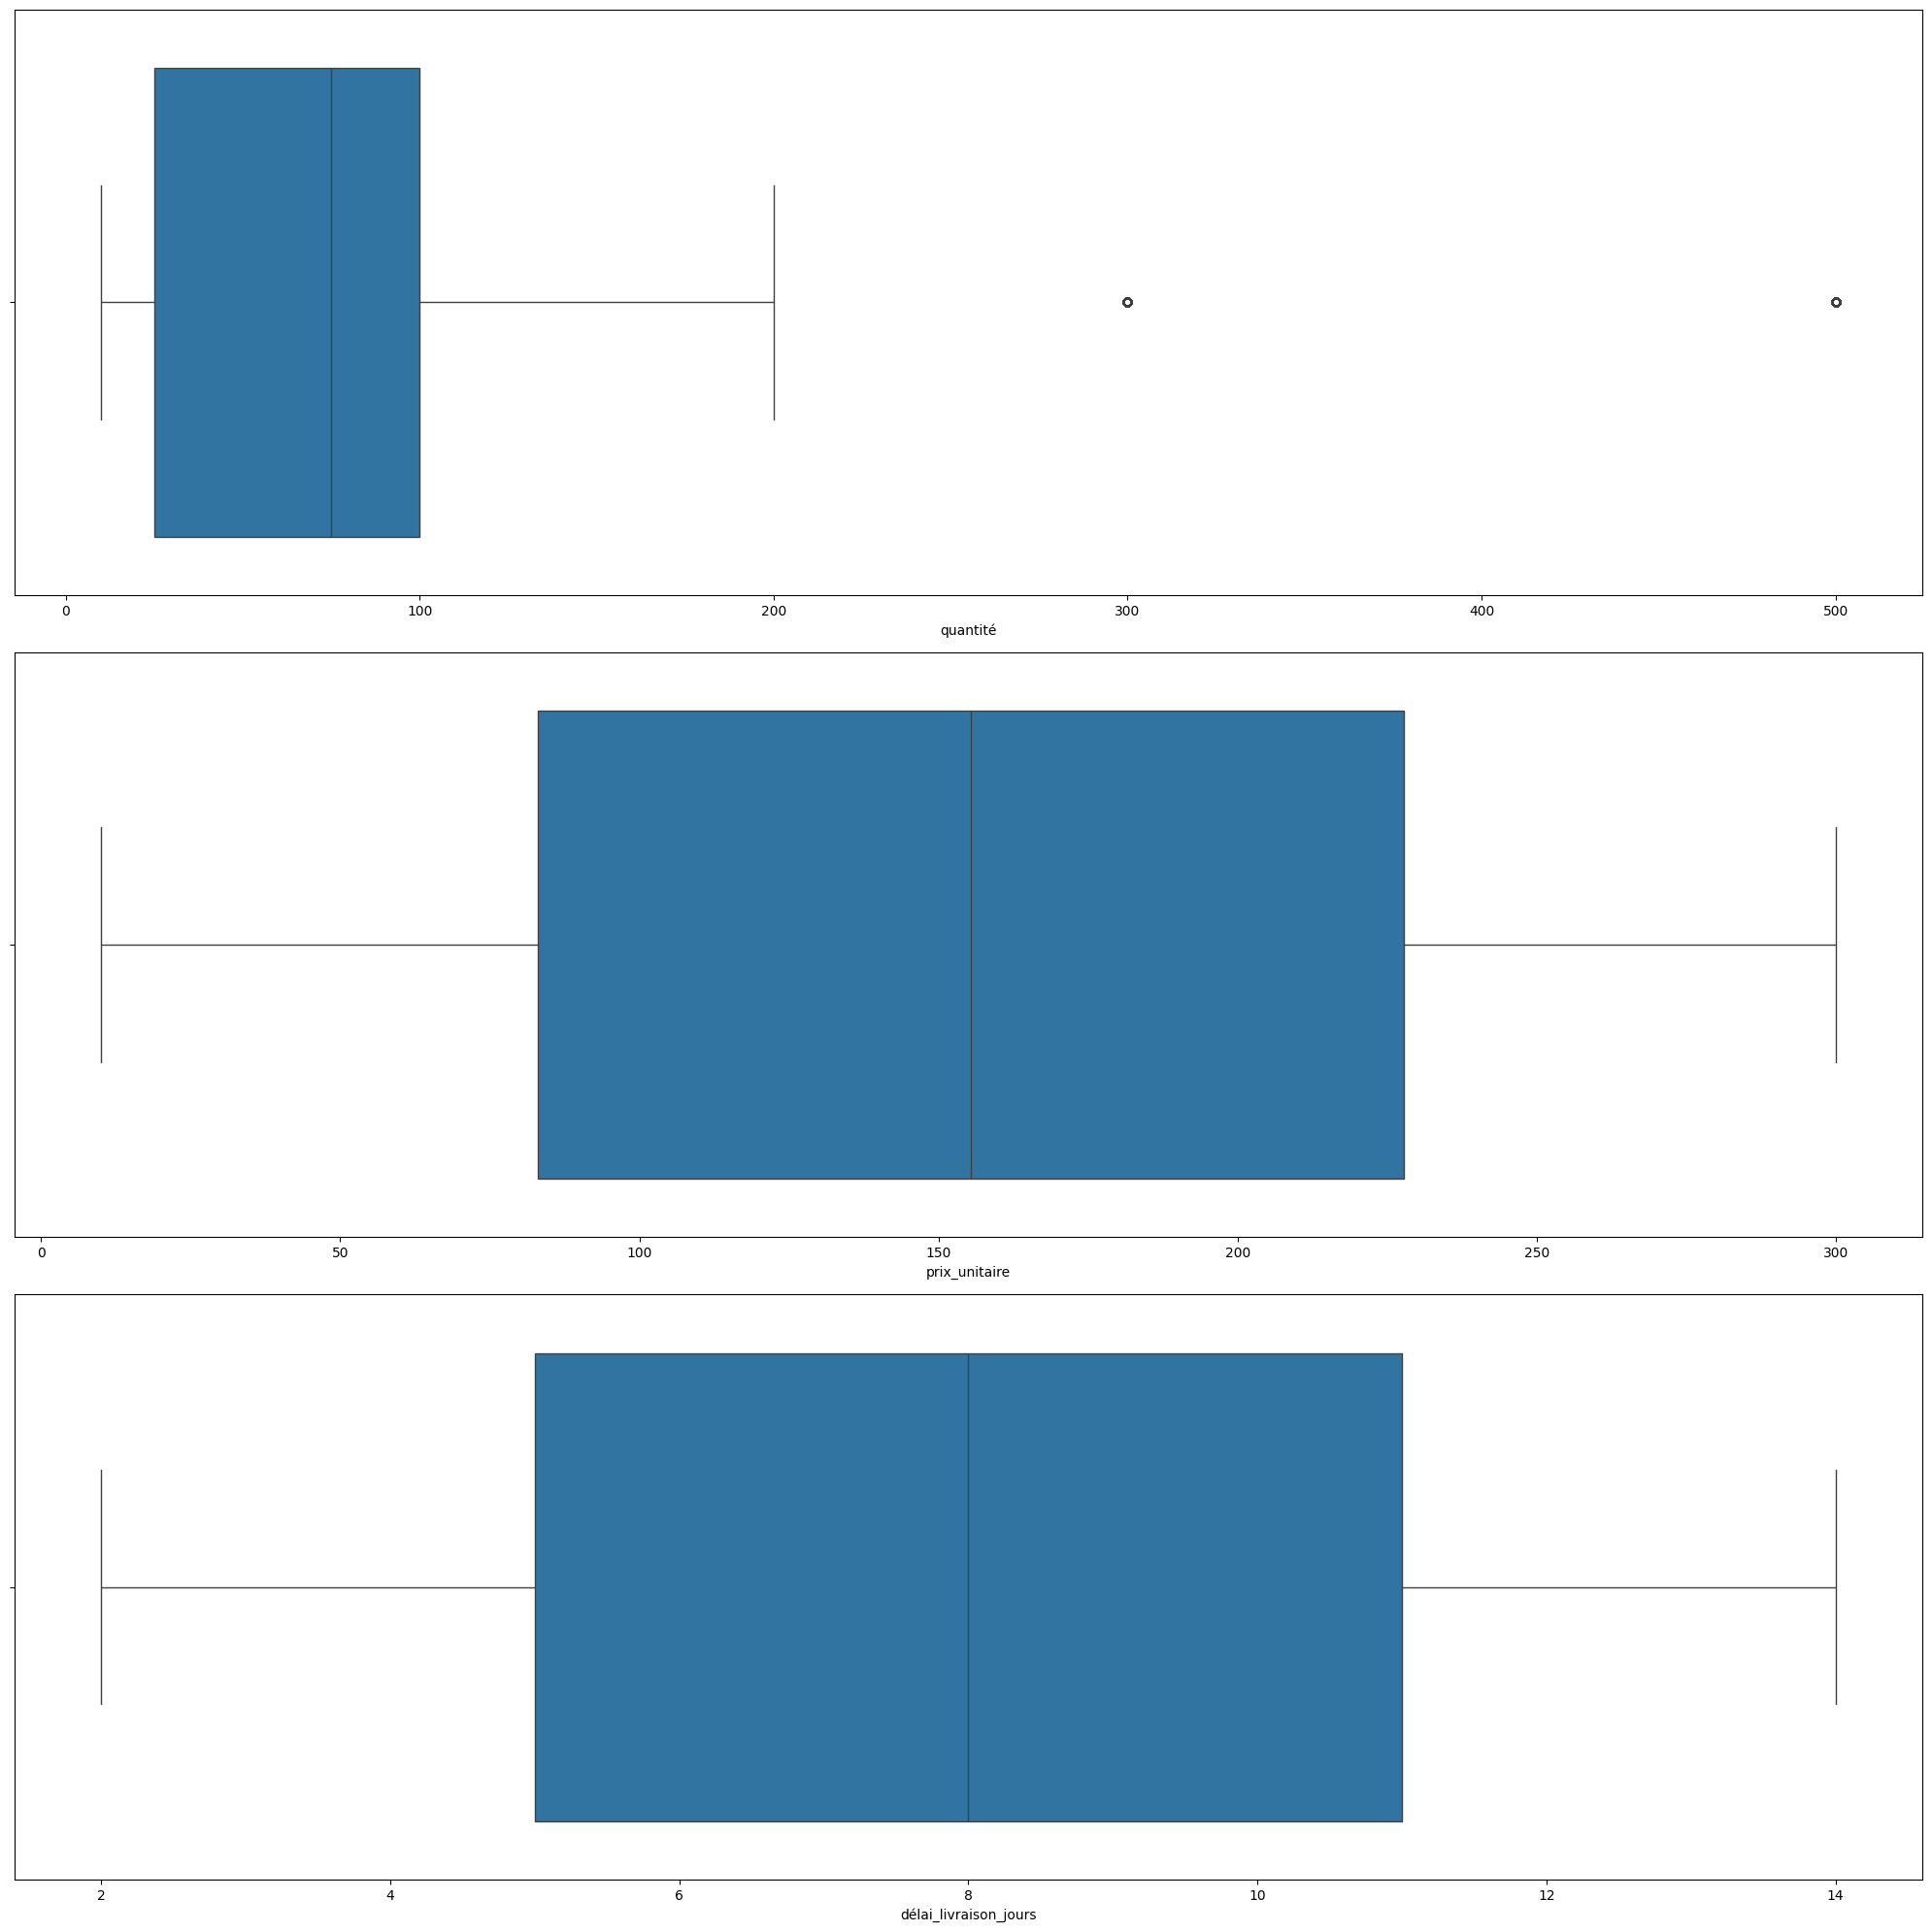

In [58]:
#on vient vérifier avec des boxplot si il y a des outliers (valeurs aberrantes)
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.boxplot(x=data['quantité'])
plt.subplot(3,1,2)
sns.boxplot(x=data['prix_unitaire'])
plt.subplot(3,1,3)
sns.boxplot(x=data['délai_livraison_jours'])
plt.tight_layout()
plt.show()

Des outliers sont présent dans la collone des quantités

<Axes: >

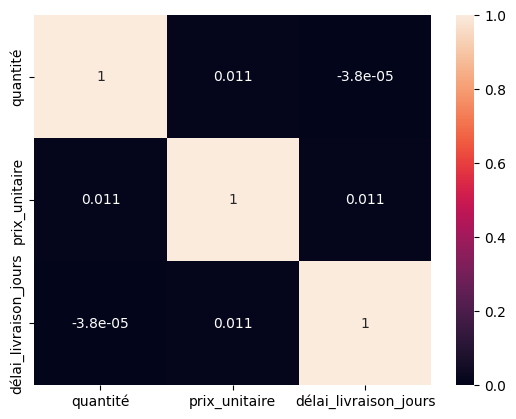

In [59]:
data_corr = data.drop(['id_achat', 'id_produit', 'id_fournisseur', 'date_achat'], axis=1)
corr = data_corr.corr()
sns.heatmap(corr, annot=True)

On constate qu'il n'y pas de corélation entre toute les collones (Très proche de 0)

In [60]:
print("Date la plus ancienne:", pd.to_datetime(data['date_achat'], format='%d/%m/%Y').min().strftime('%d/%m/%Y'))
print("Date la plus récente:", pd.to_datetime(data['date_achat'], format='%d/%m/%Y').max().strftime('%d/%m/%Y'))

Date la plus ancienne: 01/01/2024
Date la plus récente: 31/12/2024


In [61]:
# Convert string dates to datetime objects
limits = pd.to_datetime(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01', 
                        '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
                        '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-31'])
labels = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

# Convert date_achat to datetime and create month groups
data['month_group'] = pd.to_datetime(data['date_achat'], format='%d/%m/%Y').dt.strftime('%m')

data.head()


,id_achat,date_achat,id_produit,quantité,id_fournisseur,prix_unitaire,délai_livraison_jours,month_group
0,PO000001,22/03/2024,P00627,150,S029,129.62,14,03
1,PO000002,12/06/2024,P00469,50,S028,110.81,8,06
2,PO000003,19/01/2024,P00849,75,S001,140.58,8,01
3,PO000004,20/11/2024,P00484,500,S028,120.77,9,11
4,PO000005,07/06/2024,P00196,50,S025,256.05,13,06


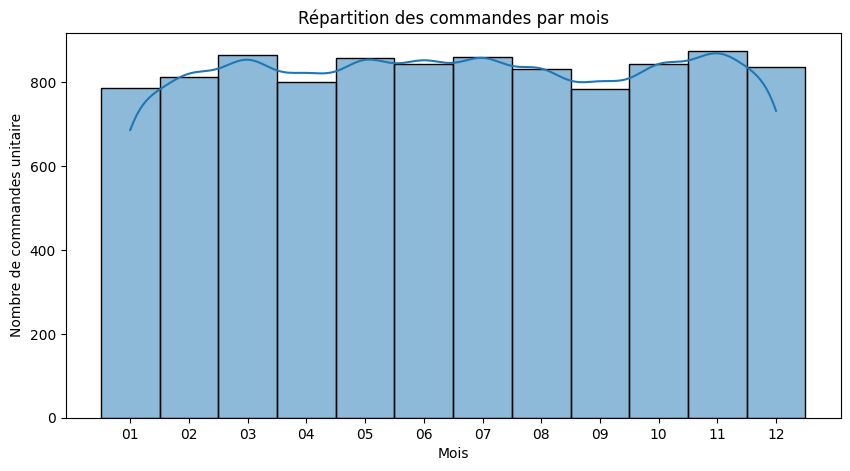

In [62]:
# Répartition des commandes par mois
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='month_group', stat='count', kde=True , discrete=True)
plt.xticks(range(len(labels)), labels)
plt.title('Répartition des commandes par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de commandes unitaire')
plt.show()


In [63]:
print("Prix unitaire minimum:", data['prix_unitaire'].min())
print("Prix unitaire maximum:", data['prix_unitaire'].max())

Prix unitaire minimum: 10.03
Prix unitaire maximum: 299.98


In [64]:

bins = [0, 40, 70, 100, 130, 160, 190, 220, 250, 280, 310, float('inf')]
labels = ['0-40', '41-70', '71-100', '101-130', '131-160', '161-190', '191-220', '221-250', '251-280', '281-310', '>310']


data['price_group'] = pd.cut(data['prix_unitaire'], bins=bins, labels=labels)

data.head()

,id_achat,date_achat,id_produit,quantité,id_fournisseur,prix_unitaire,délai_livraison_jours,month_group,price_group
0,PO000001,22/03/2024,P00627,150,S029,129.62,14,03,101-130
1,PO000002,12/06/2024,P00469,50,S028,110.81,8,06,101-130
2,PO000003,19/01/2024,P00849,75,S001,140.58,8,01,131-160
3,PO000004,20/11/2024,P00484,500,S028,120.77,9,11,101-130
4,PO000005,07/06/2024,P00196,50,S025,256.05,13,06,251-280


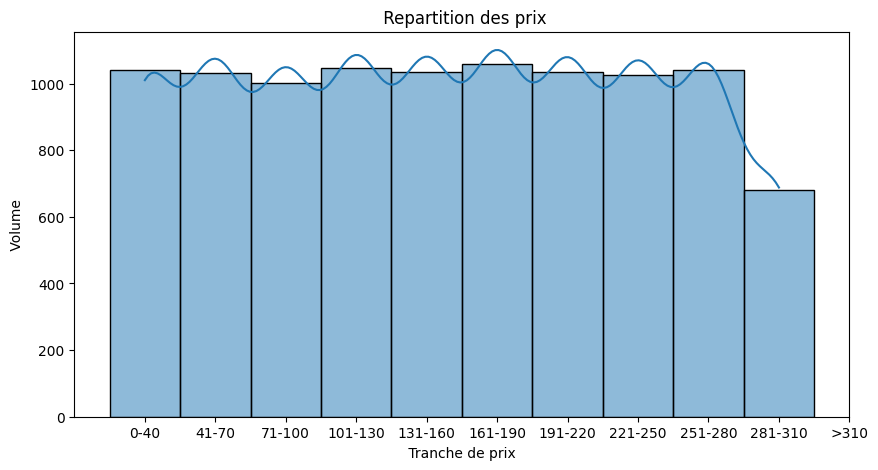

In [65]:
# Répartition des prix
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='price_group', stat='count', kde=True , discrete=True)
plt.xticks(range(len(labels)), labels)
plt.title(' Repartition des prix')
plt.xlabel(' Tranche de prix ')
plt.ylabel(' Volume ')
plt.show()


Avec ces deux groupe nous pouvons constater aucun ecart majeur des données